In [1]:
%tensorflow_version 1.x
import tensorflow
print(tensorflow.__version__)

TensorFlow 1.x selected.
1.15.2


# 모듈 임포팅

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import time

In [3]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

# 데이터 준비

1차원 데이터 x와 x**2의 1차원 데이타 y

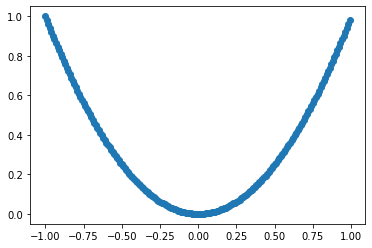

In [4]:
import numpy as np

x = np.arange(-1,1,0.01)
y = x**2

plt.scatter(x,y)

In [5]:
print(len(x))
print(x.shape)


200
(200,)


# Keras DNN 최소 코드

아래의 코드는 최소 코드.

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


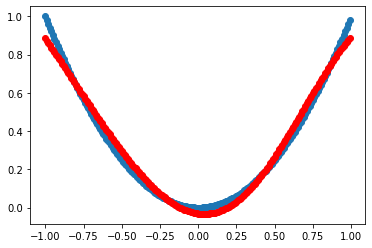

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time


# 모델 정의
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


# 컴파일 : 모델 + optimizer + loss
model.compile(optimizer="SGD", loss="mse")


# 학습
model.fit(x, y, epochs=1000, verbose=0, batch_size=20)


# 예측
y_ = model.predict(x)


# 결과 그래프로 보기
plt.scatter(x,y) # 정답
plt.scatter(x,y_,color='r') # 결과
plt.show()

## model.evaluate() - 성능 평가하기

200/200 [==============================] - 0s 169us/sample - loss: 0.0023 - mean_squared_error: 0.0023
loss= 0.0022535597160458563
mse= 0.00225356


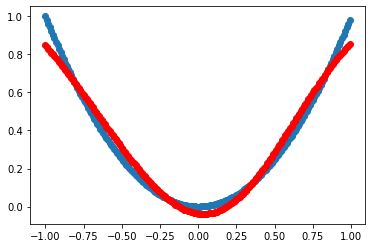

In [7]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense


model = keras.Sequential()
#model.add(Input(1))
model.add(Dense(10, activation='tanh', input_shape=(1,) ))
model.add(Dense(10, activation='tanh' ))
model.add(Dense(1))


#model.compile(optimizer="SGD", loss="mse")
model.compile(optimizer="SGD", loss="mse", metrics=["mse"])


model.fit(x, y, epochs=1000, verbose=0, batch_size=20)

loss, mse = model.evaluate(x, y) # ADD
print("loss=",loss) # ADD
print("mse=",mse) # ADD


y_ = model.predict(x)


plt.scatter(x,y)
plt.scatter(x,y_,color='r')
plt.show()

출력에 loss와 mse가 추가되었다.

## 테스트셋으로 평가하기

데이터를 train과 test으로 나누어 준비한다.

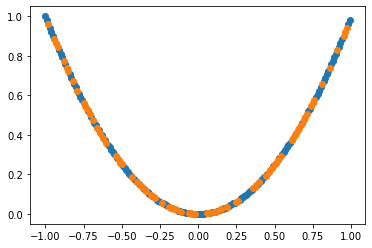

In [8]:
x = np.arange(-1,1,0.01)
np.random.shuffle(x)
y = x**2

split_index = int(x.shape[0]*0.6)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

plt.scatter(train_x,train_y)
plt.scatter(test_x,test_y)
plt.show()

80/80 [==============================] - 0s 310us/sample - loss: 0.0018 - mean_squared_error: 0.0018
loss= 0.0018362625036388637
mse= 0.0018362624


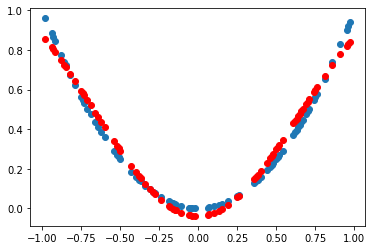

In [9]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])


# model.fit(x, y, epochs=1000, verbose=0, batch_size=20)
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)


# loss, mse = model.evaluate(x, y)
loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


# y_ = model.predict(x)
y_ = model.predict(test_x)

# plt.scatter(x,y)
plt.scatter(test_x,test_y)
# plt.scatter(x,y_,color='r')
plt.scatter(test_x,y_,color='r')
plt.show()

train_x, train_y로 학습하였고,
evaluate()와 predict()에는 test_x, test_y를 사용하였다.

그려진 그림을 보면 test_x의 점사이에 빈 간격이 보인다. 그 간격이 train_x에 해당한다.

## 학습 시간을 출력

elapsed : 10.75321102142334
80/80 [==============================] - 0s 333us/sample - loss: 0.0027 - mean_squared_error: 0.0027
loss= 0.002707631094381213
mse= 0.0027076309


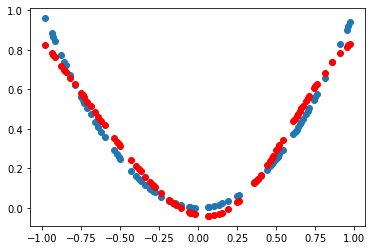

In [10]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])

start_time = time.time() # ADD
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time)) # ADD 
    

loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

elapsed로 경과된 시간이 초 단위로 보인다.

## model.summary() 네트웤 모양 보기

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.784110069274902


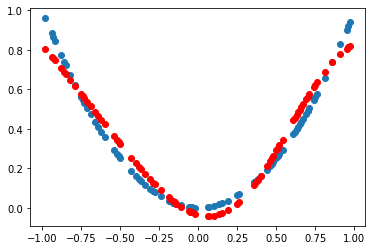

In [11]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary() # ADD

start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

네트웤의 모양이 보인다.

노드 10개, 10개를 갖는 은닉층 2개가 있다.


모든 레이어는 activation(w\*x+b) 의 형태로, 

첫 번 째 은닉층은 20개( = ((1+1)\*10) = (입력수+1)\*10)의 웨이트를, 

두 번 째 은닉층은 110개( = ( (10+1)\*10) )의 웨이트가 있다.. 


# Keras DNN Template

본 실습에 사용되는 코든 코드의 템플릿.


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.756653308868408
80/80 [==============================] - 0s 479us/sample - loss: 0.0024 - mean_squared_error: 0.0024
loss= 0.002391986083239317
mse= 0.002391986


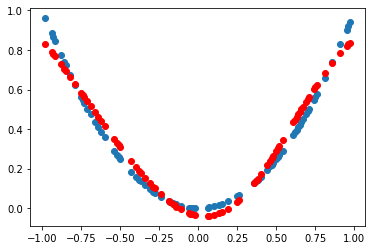

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

import time


# 모델 정의
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


# 모델 컴파일
model.compile(optimizer="SGD", loss="mse", metrics=["mse"])
model.summary()


# 학습
start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))


# 평가
loss, mse = model.evaluate(test_x, test_y)
print("loss=",loss)
print("mse=",mse)


# 예측
y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()